### Example Notebook for training and playing against a model using a LAN dataset

In [1]:
from model import Model
from read_games import read_games
from create_dataset import create_dataset
import chess
import datasets

c:\Users\Moritz\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the pretrained model with an updated vocabulary

In [2]:
model = Model("gpt2")
model.add_vocab("lan_vocab.txt")

Tokens to be added:  1968
New vocabulary size:  52225


Load LAN data and create a dataset of 10,000 games

In [3]:
read_games("../lichess_db_2_lan.pgn", 100000, format="lan", write_to_file=True, target_file_path="games.txt")
read_games("../lichess_db_2_lan.pgn", 10000, format="lan", write_to_file=True, target_file_path="games2.txt", startpoint=100000)
train_dataset = create_dataset("games.txt", model.tokenizer, block_size=96)
test_dataset = create_dataset("games2.txt", model.tokenizer, block_size=96)

c:\Users\Moritz\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\data\datasets\language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Finetune the model with the dataset

In [4]:
model.train(train_dataset=train_dataset, eval_dataset=test_dataset, output_dir="model_28", per_device_train_batch_size=32, num_train_epochs=10, save_steps=10000)

c:\Users\Moritz\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  1%|          | 500/48300 [06:25<9:51:12,  1.35it/s] 

{'loss': 6.1175, 'learning_rate': 2.5e-05, 'epoch': 0.1}


  2%|▏         | 1000/48300 [12:39<10:20:49,  1.27it/s]

{'loss': 2.8857, 'learning_rate': 5e-05, 'epoch': 0.21}


  3%|▎         | 1500/48300 [19:12<10:10:19,  1.28it/s]

{'loss': 2.7466, 'learning_rate': 4.947145877378436e-05, 'epoch': 0.31}


  4%|▍         | 2000/48300 [25:45<10:14:09,  1.26it/s]

{'loss': 2.6505, 'learning_rate': 4.894291754756871e-05, 'epoch': 0.41}


  5%|▌         | 2500/48300 [32:16<10:07:40,  1.26it/s]

{'loss': 2.5443, 'learning_rate': 4.841437632135307e-05, 'epoch': 0.52}


  6%|▌         | 3000/48300 [38:48<9:44:43,  1.29it/s] 

{'loss': 2.437, 'learning_rate': 4.788583509513742e-05, 'epoch': 0.62}


  7%|▋         | 3500/48300 [45:19<9:37:21,  1.29it/s] 

{'loss': 2.3689, 'learning_rate': 4.735729386892178e-05, 'epoch': 0.72}


  8%|▊         | 4000/48300 [51:50<9:44:54,  1.26it/s]

{'loss': 2.3022, 'learning_rate': 4.6828752642706134e-05, 'epoch': 0.83}


  9%|▉         | 4500/48300 [58:22<9:32:35,  1.27it/s]

{'loss': 2.245, 'learning_rate': 4.630021141649049e-05, 'epoch': 0.93}


 10%|█         | 5000/48300 [1:04:52<9:21:45,  1.28it/s]

{'loss': 2.1918, 'learning_rate': 4.5771670190274844e-05, 'epoch': 1.04}


 11%|█▏        | 5500/48300 [1:11:25<9:27:37,  1.26it/s]

{'loss': 2.1509, 'learning_rate': 4.52431289640592e-05, 'epoch': 1.14}


 12%|█▏        | 6000/48300 [1:17:59<9:27:36,  1.24it/s]

{'loss': 2.1091, 'learning_rate': 4.4714587737843555e-05, 'epoch': 1.24}


 13%|█▎        | 6500/48300 [1:24:31<9:17:19,  1.25it/s]

{'loss': 2.0779, 'learning_rate': 4.418604651162791e-05, 'epoch': 1.35}


 14%|█▍        | 7000/48300 [1:31:04<8:53:23,  1.29it/s]

{'loss': 2.0531, 'learning_rate': 4.3657505285412265e-05, 'epoch': 1.45}


 16%|█▌        | 7500/48300 [1:37:36<8:44:17,  1.30it/s]

{'loss': 2.0234, 'learning_rate': 4.312896405919662e-05, 'epoch': 1.55}


 17%|█▋        | 8000/48300 [1:44:09<8:40:29,  1.29it/s]

{'loss': 1.997, 'learning_rate': 4.2600422832980975e-05, 'epoch': 1.66}


 18%|█▊        | 8500/48300 [1:50:42<8:39:11,  1.28it/s]

{'loss': 1.9758, 'learning_rate': 4.207188160676533e-05, 'epoch': 1.76}


 19%|█▊        | 9000/48300 [1:57:15<8:44:00,  1.25it/s]

{'loss': 1.9584, 'learning_rate': 4.1543340380549686e-05, 'epoch': 1.86}


 20%|█▉        | 9500/48300 [2:03:47<8:34:36,  1.26it/s]

{'loss': 1.9382, 'learning_rate': 4.101479915433404e-05, 'epoch': 1.97}


 21%|██        | 10000/48300 [2:10:20<8:22:48,  1.27it/s]

{'loss': 1.9159, 'learning_rate': 4.0486257928118396e-05, 'epoch': 2.07}


 22%|██▏       | 10500/48300 [2:16:58<8:23:54,  1.25it/s] 

{'loss': 1.8987, 'learning_rate': 3.9957716701902745e-05, 'epoch': 2.17}


 23%|██▎       | 11000/48300 [2:23:27<7:50:07,  1.32it/s]

{'loss': 1.8861, 'learning_rate': 3.942917547568711e-05, 'epoch': 2.28}


 24%|██▍       | 11500/48300 [2:29:59<7:56:26,  1.29it/s]

{'loss': 1.872, 'learning_rate': 3.890063424947146e-05, 'epoch': 2.38}


 25%|██▍       | 12000/48300 [2:36:27<7:48:19,  1.29it/s]

{'loss': 1.8632, 'learning_rate': 3.837209302325582e-05, 'epoch': 2.48}


 26%|██▌       | 12500/48300 [2:42:57<7:46:56,  1.28it/s]

{'loss': 1.8462, 'learning_rate': 3.784355179704017e-05, 'epoch': 2.59}


 27%|██▋       | 13000/48300 [2:49:29<7:46:32,  1.26it/s]

{'loss': 1.8355, 'learning_rate': 3.731501057082453e-05, 'epoch': 2.69}


 28%|██▊       | 13500/48300 [2:55:58<7:28:04,  1.29it/s]

{'loss': 1.8272, 'learning_rate': 3.678646934460888e-05, 'epoch': 2.8}


 29%|██▉       | 14000/48300 [3:02:31<7:22:31,  1.29it/s]

{'loss': 1.8213, 'learning_rate': 3.625792811839324e-05, 'epoch': 2.9}


 30%|███       | 14500/48300 [3:09:05<7:15:35,  1.29it/s]

{'loss': 1.8072, 'learning_rate': 3.572938689217759e-05, 'epoch': 3.0}


 31%|███       | 15000/48300 [3:15:36<7:15:30,  1.27it/s]

{'loss': 1.7886, 'learning_rate': 3.520084566596195e-05, 'epoch': 3.11}


 32%|███▏      | 15500/48300 [3:22:04<7:16:34,  1.25it/s]

{'loss': 1.7885, 'learning_rate': 3.4672304439746304e-05, 'epoch': 3.21}


 33%|███▎      | 16000/48300 [3:28:38<6:56:37,  1.29it/s]

{'loss': 1.7762, 'learning_rate': 3.414376321353065e-05, 'epoch': 3.31}


 34%|███▍      | 16500/48300 [3:35:07<6:51:10,  1.29it/s]

{'loss': 1.7659, 'learning_rate': 3.361522198731501e-05, 'epoch': 3.42}


 35%|███▌      | 17000/48300 [3:41:35<6:41:31,  1.30it/s]

{'loss': 1.7647, 'learning_rate': 3.308668076109937e-05, 'epoch': 3.52}


 36%|███▌      | 17500/48300 [3:48:03<6:39:03,  1.29it/s]

{'loss': 1.7657, 'learning_rate': 3.2558139534883724e-05, 'epoch': 3.62}


 37%|███▋      | 18000/48300 [3:54:33<6:34:31,  1.28it/s]

{'loss': 1.7581, 'learning_rate': 3.202959830866808e-05, 'epoch': 3.73}


 38%|███▊      | 18500/48300 [4:01:00<6:33:46,  1.26it/s]

{'loss': 1.749, 'learning_rate': 3.1501057082452435e-05, 'epoch': 3.83}


 39%|███▉      | 19000/48300 [4:07:28<6:24:32,  1.27it/s]

{'loss': 1.747, 'learning_rate': 3.097251585623679e-05, 'epoch': 3.93}


 40%|████      | 19500/48300 [4:13:56<6:21:15,  1.26it/s]

{'loss': 1.7323, 'learning_rate': 3.0443974630021145e-05, 'epoch': 4.04}


 41%|████▏     | 20000/48300 [4:20:29<6:11:56,  1.27it/s]

{'loss': 1.7221, 'learning_rate': 2.9915433403805497e-05, 'epoch': 4.14}


 42%|████▏     | 20500/48300 [4:27:03<6:01:47,  1.28it/s] 

{'loss': 1.7204, 'learning_rate': 2.9386892177589852e-05, 'epoch': 4.24}


 43%|████▎     | 21000/48300 [4:33:35<6:01:07,  1.26it/s]

{'loss': 1.7109, 'learning_rate': 2.8858350951374207e-05, 'epoch': 4.35}


 45%|████▍     | 21500/48300 [4:40:07<5:53:48,  1.26it/s]

{'loss': 1.7144, 'learning_rate': 2.8329809725158563e-05, 'epoch': 4.45}


 46%|████▌     | 22000/48300 [4:46:41<5:39:02,  1.29it/s]

{'loss': 1.7115, 'learning_rate': 2.7801268498942918e-05, 'epoch': 4.55}


 47%|████▋     | 22500/48300 [4:53:13<5:42:03,  1.26it/s]

{'loss': 1.7037, 'learning_rate': 2.7272727272727273e-05, 'epoch': 4.66}


 48%|████▊     | 23000/48300 [4:59:46<5:30:41,  1.28it/s]

{'loss': 1.7002, 'learning_rate': 2.674418604651163e-05, 'epoch': 4.76}


 49%|████▊     | 23500/48300 [5:06:13<5:33:36,  1.24it/s]

{'loss': 1.6996, 'learning_rate': 2.6215644820295987e-05, 'epoch': 4.87}


 50%|████▉     | 24000/48300 [5:12:44<5:16:13,  1.28it/s]

{'loss': 1.6921, 'learning_rate': 2.5687103594080342e-05, 'epoch': 4.97}


 51%|█████     | 24500/48300 [5:19:16<5:05:58,  1.30it/s]

{'loss': 1.6839, 'learning_rate': 2.5158562367864697e-05, 'epoch': 5.07}


 52%|█████▏    | 25000/48300 [5:25:48<5:02:18,  1.28it/s]

{'loss': 1.673, 'learning_rate': 2.4630021141649053e-05, 'epoch': 5.18}


 53%|█████▎    | 25500/48300 [5:32:20<5:03:50,  1.25it/s]

{'loss': 1.6709, 'learning_rate': 2.4101479915433404e-05, 'epoch': 5.28}


 54%|█████▍    | 26000/48300 [5:38:53<4:48:06,  1.29it/s]

{'loss': 1.6734, 'learning_rate': 2.357293868921776e-05, 'epoch': 5.38}


 55%|█████▍    | 26500/48300 [5:45:22<4:36:52,  1.31it/s]

{'loss': 1.6691, 'learning_rate': 2.3044397463002115e-05, 'epoch': 5.49}


 56%|█████▌    | 27000/48300 [5:51:52<4:33:21,  1.30it/s]

{'loss': 1.6663, 'learning_rate': 2.251585623678647e-05, 'epoch': 5.59}


 57%|█████▋    | 27500/48300 [5:58:24<4:33:53,  1.27it/s]

{'loss': 1.6659, 'learning_rate': 2.1987315010570825e-05, 'epoch': 5.69}


 58%|█████▊    | 28000/48300 [6:04:57<4:30:33,  1.25it/s]

{'loss': 1.6651, 'learning_rate': 2.145877378435518e-05, 'epoch': 5.8}


 59%|█████▉    | 28500/48300 [6:11:30<4:14:03,  1.30it/s]

{'loss': 1.669, 'learning_rate': 2.0930232558139536e-05, 'epoch': 5.9}


 60%|██████    | 29000/48300 [6:18:03<4:09:45,  1.29it/s]

{'loss': 1.6605, 'learning_rate': 2.040169133192389e-05, 'epoch': 6.0}


 61%|██████    | 29500/48300 [6:24:36<4:09:24,  1.26it/s]

{'loss': 1.6501, 'learning_rate': 1.9873150105708246e-05, 'epoch': 6.11}


 62%|██████▏   | 30000/48300 [6:31:07<4:03:48,  1.25it/s]

{'loss': 1.6396, 'learning_rate': 1.93446088794926e-05, 'epoch': 6.21}


 63%|██████▎   | 30500/48300 [6:37:42<3:56:56,  1.25it/s]

{'loss': 1.6431, 'learning_rate': 1.8816067653276956e-05, 'epoch': 6.31}


 64%|██████▍   | 31000/48300 [6:44:15<3:48:12,  1.26it/s]

{'loss': 1.6439, 'learning_rate': 1.8287526427061312e-05, 'epoch': 6.42}


 65%|██████▌   | 31500/48300 [6:50:48<3:38:57,  1.28it/s]

{'loss': 1.6423, 'learning_rate': 1.7758985200845667e-05, 'epoch': 6.52}


 66%|██████▋   | 32000/48300 [6:57:21<3:28:52,  1.30it/s]

{'loss': 1.6392, 'learning_rate': 1.7230443974630022e-05, 'epoch': 6.63}


 67%|██████▋   | 32500/48300 [7:03:54<3:23:21,  1.29it/s]

{'loss': 1.6344, 'learning_rate': 1.6701902748414377e-05, 'epoch': 6.73}


 68%|██████▊   | 33000/48300 [7:10:27<3:20:29,  1.27it/s]

{'loss': 1.6343, 'learning_rate': 1.6173361522198733e-05, 'epoch': 6.83}


 69%|██████▉   | 33500/48300 [7:17:00<3:16:25,  1.26it/s]

{'loss': 1.631, 'learning_rate': 1.5644820295983088e-05, 'epoch': 6.94}


 70%|███████   | 34000/48300 [7:23:32<3:10:20,  1.25it/s]

{'loss': 1.6294, 'learning_rate': 1.5116279069767441e-05, 'epoch': 7.04}


 71%|███████▏  | 34500/48300 [7:30:05<3:04:12,  1.25it/s]

{'loss': 1.6259, 'learning_rate': 1.4587737843551796e-05, 'epoch': 7.14}


 72%|███████▏  | 35000/48300 [7:36:38<2:52:49,  1.28it/s]

{'loss': 1.619, 'learning_rate': 1.4059196617336153e-05, 'epoch': 7.25}


 73%|███████▎  | 35500/48300 [7:43:11<2:44:20,  1.30it/s]

{'loss': 1.6165, 'learning_rate': 1.3530655391120509e-05, 'epoch': 7.35}


 75%|███████▍  | 36000/48300 [7:49:42<2:41:43,  1.27it/s]

{'loss': 1.6185, 'learning_rate': 1.3002114164904864e-05, 'epoch': 7.45}


 76%|███████▌  | 36500/48300 [7:56:15<2:37:18,  1.25it/s]

{'loss': 1.6204, 'learning_rate': 1.2473572938689217e-05, 'epoch': 7.56}


 77%|███████▋  | 37000/48300 [8:02:47<2:29:57,  1.26it/s]

{'loss': 1.618, 'learning_rate': 1.1945031712473574e-05, 'epoch': 7.66}


 78%|███████▊  | 37500/48300 [8:09:19<2:21:20,  1.27it/s]

{'loss': 1.62, 'learning_rate': 1.141649048625793e-05, 'epoch': 7.76}


 79%|███████▊  | 38000/48300 [8:15:52<2:12:47,  1.29it/s]

{'loss': 1.6091, 'learning_rate': 1.0887949260042283e-05, 'epoch': 7.87}


 80%|███████▉  | 38500/48300 [8:22:23<2:07:07,  1.28it/s]

{'loss': 1.6135, 'learning_rate': 1.0359408033826638e-05, 'epoch': 7.97}


 81%|████████  | 39000/48300 [8:28:50<1:58:05,  1.31it/s]

{'loss': 1.6064, 'learning_rate': 9.830866807610995e-06, 'epoch': 8.07}


 82%|████████▏ | 39500/48300 [8:35:12<1:43:57,  1.41it/s]

{'loss': 1.6056, 'learning_rate': 9.302325581395349e-06, 'epoch': 8.18}


 83%|████████▎ | 40000/48300 [8:41:14<1:42:54,  1.34it/s]

{'loss': 1.6048, 'learning_rate': 8.773784355179704e-06, 'epoch': 8.28}


 84%|████████▍ | 40500/48300 [8:47:32<1:36:40,  1.34it/s]

{'loss': 1.6014, 'learning_rate': 8.24524312896406e-06, 'epoch': 8.39}


 85%|████████▍ | 41000/48300 [8:53:51<1:34:06,  1.29it/s]

{'loss': 1.6065, 'learning_rate': 7.716701902748414e-06, 'epoch': 8.49}


 86%|████████▌ | 41500/48300 [9:00:10<1:24:27,  1.34it/s]

{'loss': 1.6006, 'learning_rate': 7.1881606765327695e-06, 'epoch': 8.59}


 87%|████████▋ | 42000/48300 [9:06:30<1:20:51,  1.30it/s]

{'loss': 1.6031, 'learning_rate': 6.6596194503171255e-06, 'epoch': 8.7}


 88%|████████▊ | 42500/48300 [9:12:47<1:11:33,  1.35it/s]

{'loss': 1.6043, 'learning_rate': 6.13107822410148e-06, 'epoch': 8.8}


 89%|████████▉ | 43000/48300 [9:19:06<1:08:01,  1.30it/s]

{'loss': 1.6009, 'learning_rate': 5.602536997885836e-06, 'epoch': 8.9}


 90%|█████████ | 43500/48300 [9:25:25<59:31,  1.34it/s]  

{'loss': 1.5994, 'learning_rate': 5.07399577167019e-06, 'epoch': 9.01}


 91%|█████████ | 44000/48300 [9:31:44<55:15,  1.30it/s]  

{'loss': 1.5939, 'learning_rate': 4.5454545454545455e-06, 'epoch': 9.11}


 92%|█████████▏| 44500/48300 [9:38:03<47:15,  1.34it/s]

{'loss': 1.5898, 'learning_rate': 4.016913319238901e-06, 'epoch': 9.21}


 93%|█████████▎| 45000/48300 [9:44:22<42:14,  1.30it/s]

{'loss': 1.5934, 'learning_rate': 3.488372093023256e-06, 'epoch': 9.32}


 94%|█████████▍| 45500/48300 [9:50:41<34:52,  1.34it/s]

{'loss': 1.5921, 'learning_rate': 2.959830866807611e-06, 'epoch': 9.42}


 95%|█████████▌| 46000/48300 [9:57:00<29:26,  1.30it/s]

{'loss': 1.5899, 'learning_rate': 2.4312896405919664e-06, 'epoch': 9.52}


 96%|█████████▋| 46500/48300 [10:03:43<25:16,  1.19it/s]

{'loss': 1.5919, 'learning_rate': 1.9027484143763216e-06, 'epoch': 9.63}


 97%|█████████▋| 47000/48300 [10:10:18<17:25,  1.24it/s]

{'loss': 1.5959, 'learning_rate': 1.3742071881606766e-06, 'epoch': 9.73}


 98%|█████████▊| 47500/48300 [10:16:41<09:55,  1.34it/s]

{'loss': 1.5992, 'learning_rate': 8.456659619450318e-07, 'epoch': 9.83}


 99%|█████████▉| 48000/48300 [10:22:52<03:44,  1.34it/s]

{'loss': 1.5936, 'learning_rate': 3.171247357293869e-07, 'epoch': 9.94}


100%|██████████| 48300/48300 [10:26:38<00:00,  1.28it/s]


{'train_runtime': 37598.3831, 'train_samples_per_second': 41.104, 'train_steps_per_second': 1.285, 'train_loss': 1.8357118904319116, 'epoch': 10.0}


Load the trained model 

In [5]:
model.load("model_28")

Play a game against it

In [26]:
class Game:
    def __init__(self):
        self.board = chess.Board()
        self.board.push_uci("e2e4")
        self.board.push_uci("e7e5")
        self.player = "human"
        self.uci = "1. e4 e5"
        self.move_count = 2
    
    def get_move(self):
        if self.player == "human":
            move = str(input("Your move: "))
            self.player = "ai"
            self.uci += " "+str(self.move_count) + "."
            self.move_count += 1
            self.uci = self.uci + " "+ move 
            self.board.push_uci(move)
        else:
            try:
                print(self.uci)
                move = model.generate(self.uci, 1, 1)[0]
                move = move.replace(self.uci, "")
                move = move.split(" ")[1]
                self.board.push_uci(move)
            except:
                print(self.uci)
                move = model.generate_legal_move(self.uci, self.board)
                move = move.replace(self.uci, "")
                move = move.split(" ")[1]
                self.board.push_uci(move)
            print(move)
            self.player = "human"
            self.uci = self.uci + " "+ move 

        if self.board.is_game_over():
            display(self.board)
            print("Game over")
            return False
        return True

game = Game()

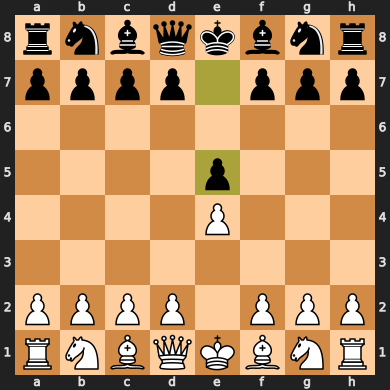

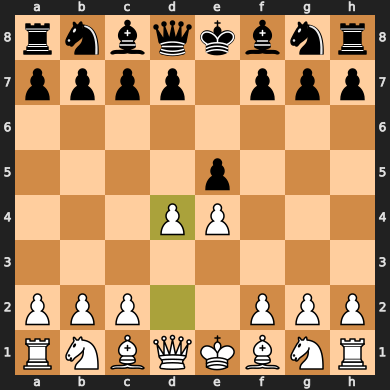

1. e4 e5 2. d2d4
d7d5


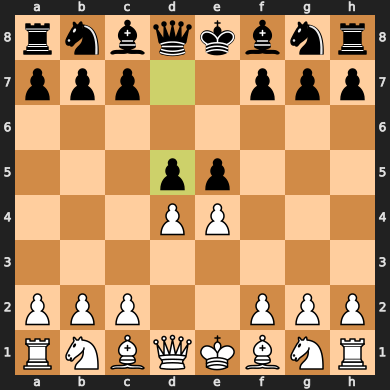

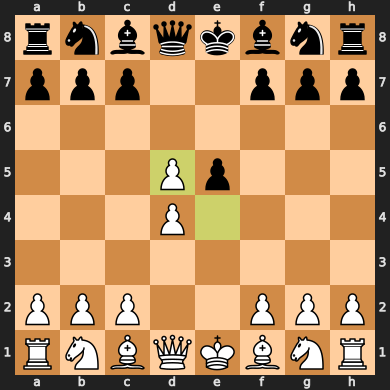

1. e4 e5 2. d2d4 d7d5 3. e4d5
d8d5


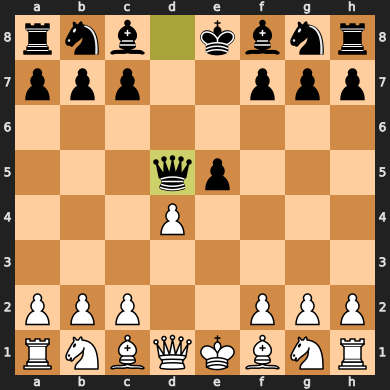

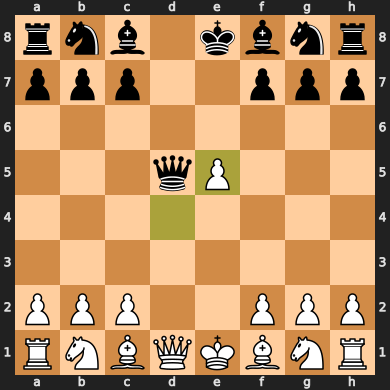

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5
d5e5


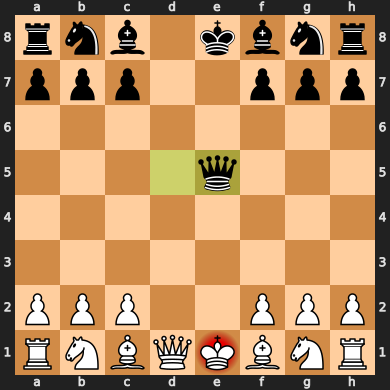

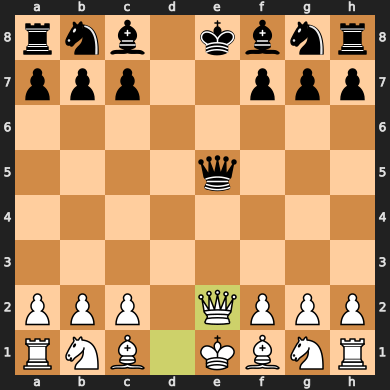

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2
b8c6


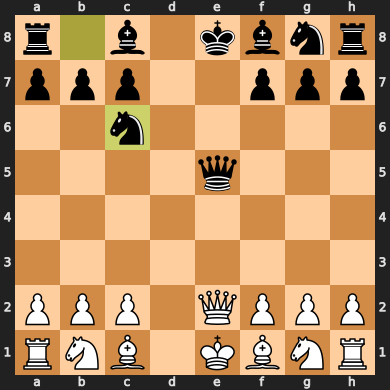

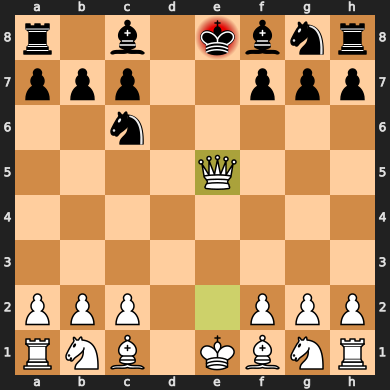

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5
c6e5


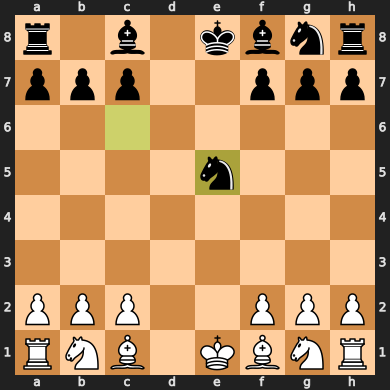

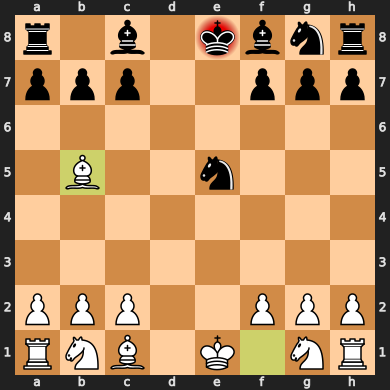

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5
c8d7


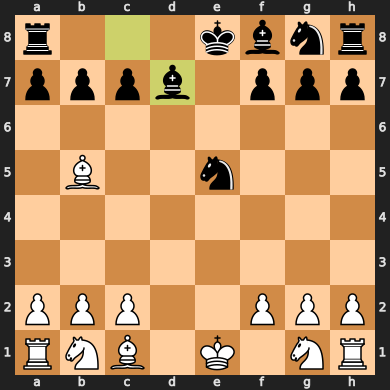

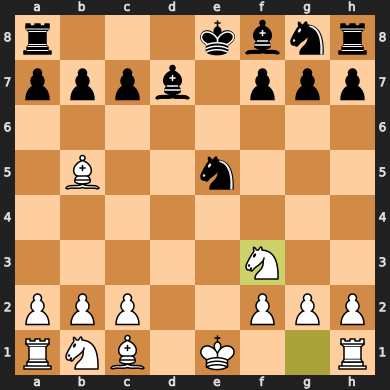

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3
e5f3


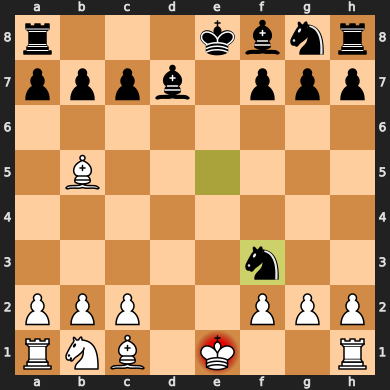

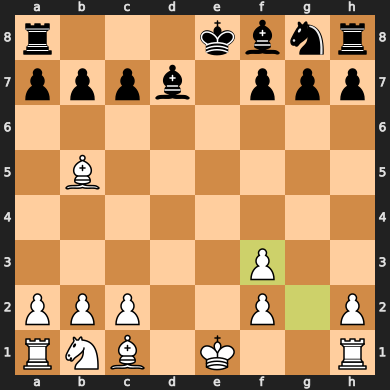

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3 e5f3 9. g2f3
e8c8


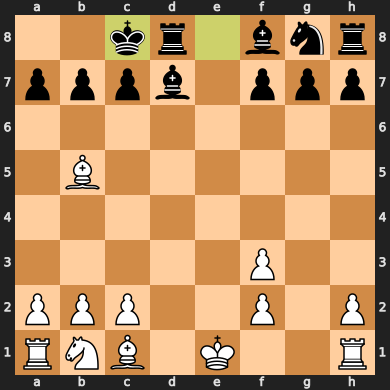

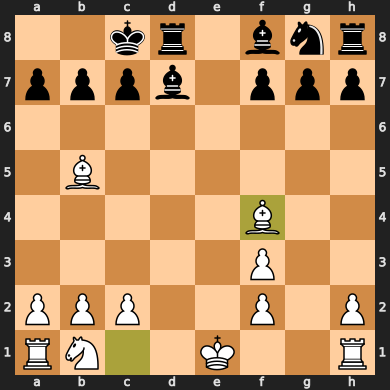

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3 e5f3 9. g2f3 e8c8 10. c1f4
g8f6


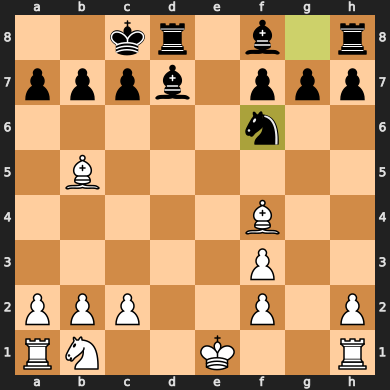

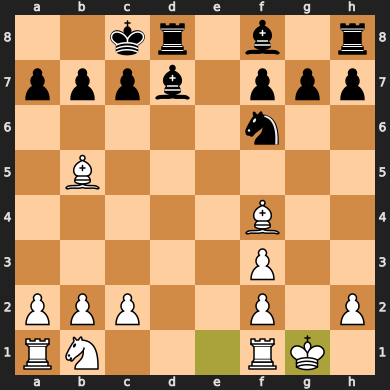

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3 e5f3 9. g2f3 e8c8 10. c1f4 g8f6 11. e1g1


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3 e5f3 9. g2f3 e8c8 10. c1f4 g8f6 11. e1g1
f8d6


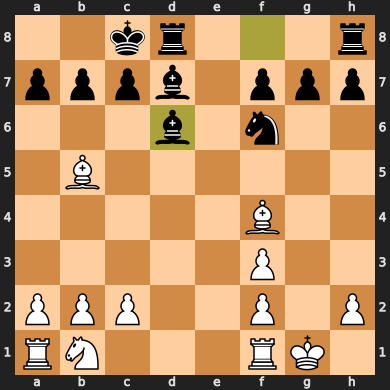

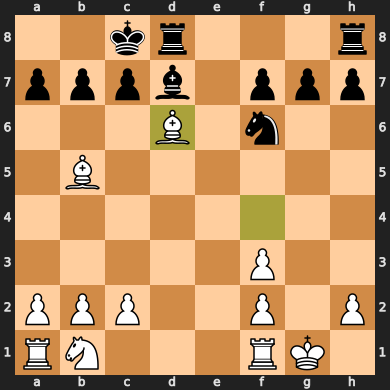

1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3 e5f3 9. g2f3 e8c8 10. c1f4 g8f6 11. e1g1 f8d6 12. f4d6


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1. e4 e5 2. d2d4 d7d5 3. e4d5 d8d5 4. d4e5 d5e5 5. d1e2 b8c6 6. e2e5 c6e5 7. f1b5 c8d7 8. g1f3 e5f3 9. g2f3 e8c8 10. c1f4 g8f6 11. e1g1 f8d6 12. f4d6
c7d6


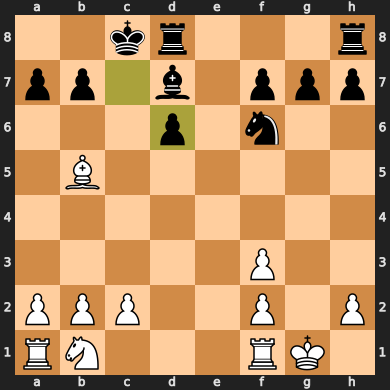

InvalidMoveError: expected uci string to be of length 4 or 5: ''

In [27]:
ongoing = True
while ongoing:
    display(game.board)
    ongoing = game.get_move()